In [1]:
import pandas as pd
train = pd.read_csv("../../../input/ddareung/train.csv")
test = pd.read_csv("../../../input/ddareung/test.csv")
submission = pd.read_csv("../../../input/ddareung/submission.csv")

In [2]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [4]:
train.describe(include='all')

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


<AxesSubplot:>

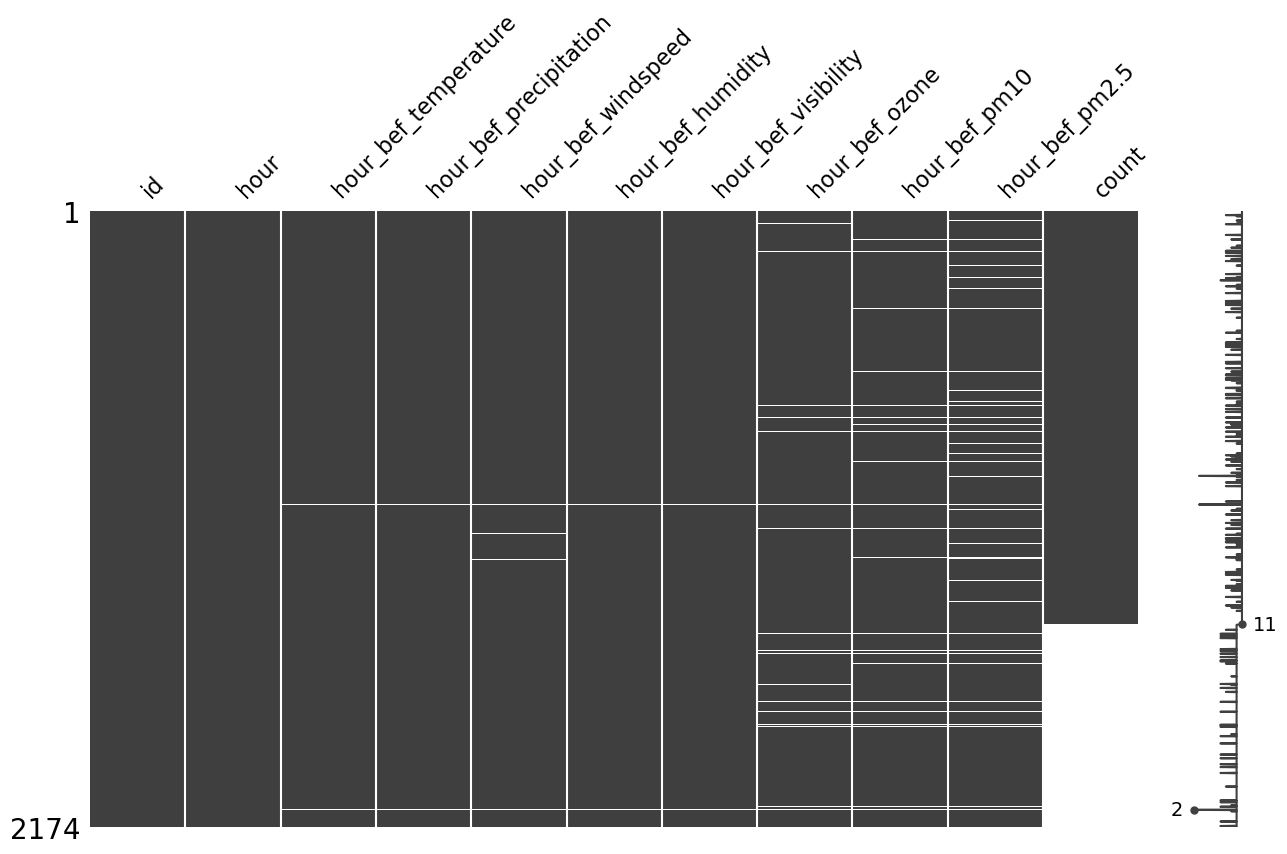

In [5]:
import missingno
data = pd.concat((train, test))
missingno.matrix(data, figsize = (15,8))

<AxesSubplot:xlabel='hour'>

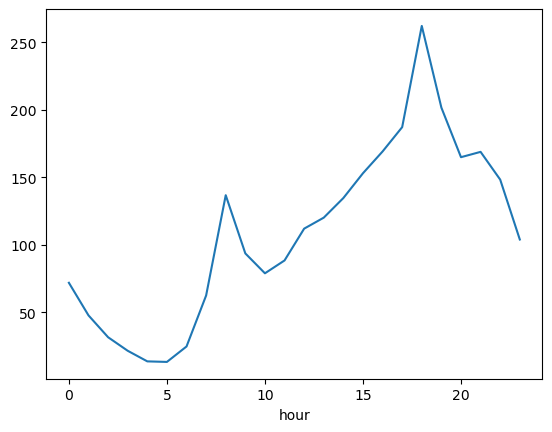

In [6]:
train.groupby('hour').mean()['count'].plot()

In [7]:
train.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [8]:
train[train['hour_bef_temperature'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [9]:
train.groupby('hour').mean()['hour_bef_temperature']

hour
0     14.788136
1     14.155738
2     13.747541
3     13.357377
4     13.001639
5     12.673770
6     12.377049
7     12.191803
8     12.600000
9     14.318033
10    16.242623
11    18.019672
12    19.457377
13    20.648333
14    21.234426
15    21.744262
16    22.015000
17    21.603333
18    20.926667
19    19.704918
20    18.191803
21    16.978333
22    16.063934
23    15.418033
Name: hour_bef_temperature, dtype: float64

In [10]:
train.loc[934]

id                        1420.0
hour                         0.0
hour_bef_temperature         NaN
hour_bef_precipitation       NaN
hour_bef_windspeed           NaN
hour_bef_humidity            NaN
hour_bef_visibility          NaN
hour_bef_ozone               NaN
hour_bef_pm10                NaN
hour_bef_pm2.5               NaN
count                       39.0
Name: 934, dtype: float64

In [11]:
int(train.loc[934]['hour'])

0

In [12]:
temp = data.copy()

In [13]:
temp

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
...,...,...,...,...,...,...,...,...,...,...,...
710,2148,1,24.6,0.0,2.4,60.0,1745.0,NaN,NaN,NaN,NaN
711,2149,1,18.1,0.0,1.0,55.0,2000.0,NaN,NaN,NaN,NaN
712,2165,9,23.3,0.0,2.3,66.0,1789.0,0.020,17.0,15.0,NaN
713,2166,16,27.0,0.0,1.6,46.0,1956.0,0.032,40.0,26.0,NaN


In [14]:
train.groupby('hour').mean()['hour_bef_temperature']

hour
0     14.788136
1     14.155738
2     13.747541
3     13.357377
4     13.001639
5     12.673770
6     12.377049
7     12.191803
8     12.600000
9     14.318033
10    16.242623
11    18.019672
12    19.457377
13    20.648333
14    21.234426
15    21.744262
16    22.015000
17    21.603333
18    20.926667
19    19.704918
20    18.191803
21    16.978333
22    16.063934
23    15.418033
Name: hour_bef_temperature, dtype: float64

In [15]:
data[data['hour_bef_temperature'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
653,1943,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
data.loc[934]['hour_bef_temperature'] = 14.788136
data.loc[1035]['hour_bef_temperature'] = 20.926667

data.loc[653]['hour_bef_temperature'] = 20.926667

/var/folders/35/vwzsjscj09798nnlnt01jbm80000gn/T/ipykernel_44299/1603966059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[934]['hour_bef_temperature'] = 14.788136
/var/folders/35/vwzsjscj09798nnlnt01jbm80000gn/T/ipykernel_44299/1603966059.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[1035]['hour_bef_temperature'] = 20.926667
/var/folders/35/vwzsjscj09798nnlnt01jbm80000gn/T/ipykernel_44299/1603966059.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [17]:
data[data['hour_bef_temperature'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
653,1943,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
data.loc[653]['hour_bef_temperature']

653    11.8
653     NaN
Name: hour_bef_temperature, dtype: float64

In [19]:
data.loc[934]['hour_bef_temperature'] = 14.788136

/var/folders/35/vwzsjscj09798nnlnt01jbm80000gn/T/ipykernel_44299/647621648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[934]['hour_bef_temperature'] = 14.788136


In [20]:
data.loc[934,'hour_bef_temperature'] = 14.788136

In [21]:
data[data['hour_bef_temperature'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
1035,1553,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
653,1943,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
data.loc[1035,'hour_bef_temperature'] = 20.926667
data.loc[653,'hour_bef_temperature'] = 19.704918

In [23]:
data[data['hour_bef_temperature'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count


In [24]:
data[data['hour_bef_precipitation'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,14.788136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,20.926667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
653,1943,19,19.704918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
train.groupby('hour').mean()['hour_bef_precipitation']

hour
0     0.016949
1     0.049180
2     0.049180
3     0.032787
4     0.016393
5     0.016393
6     0.016393
7     0.016393
8     0.032787
9     0.016393
10    0.016393
11    0.000000
12    0.016393
13    0.016667
14    0.065574
15    0.065574
16    0.050000
17    0.100000
18    0.016667
19    0.032787
20    0.049180
21    0.016667
22    0.032787
23    0.016393
Name: hour_bef_precipitation, dtype: float64

In [26]:
data.loc[934,'hour_bef_precipitation'] = train.groupby('hour').mean()['hour_bef_precipitation'][int(data.loc[935,'hour'])]

data.loc[1035,'hour_bef_precipitation'] = train.groupby('hour').mean()['hour_bef_precipitation'][int(data.loc[1035,'hour'])]

data.loc[653,'hour_bef_precipitation'] = 0.032787


In [27]:
data[data['hour_bef_precipitation'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count


In [28]:
data.loc[934,:]

id                        1420.000000
hour                         0.000000
hour_bef_temperature        14.788136
hour_bef_precipitation       0.016393
hour_bef_windspeed                NaN
hour_bef_humidity                 NaN
hour_bef_visibility               NaN
hour_bef_ozone                    NaN
hour_bef_pm10                     NaN
hour_bef_pm2.5                    NaN
count                       39.000000
Name: 934, dtype: float64

In [29]:
train.groupby('hour').mean()['hour_bef_windspeed']

hour
0     1.965517
1     1.836667
2     1.633333
3     1.620000
4     1.409836
5     1.296721
6     1.331148
7     1.262295
8     1.632787
9     1.829508
10    2.122951
11    2.485246
12    2.766667
13    3.281356
14    3.522951
15    3.768852
16    3.820000
17    3.801667
18    3.838333
19    3.595082
20    3.278333
21    2.755000
22    2.498361
23    2.195082
Name: hour_bef_windspeed, dtype: float64

In [30]:
train.corr()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
id,1.000000,-0.010901,-0.000029,-0.056267,-0.003353,-0.017948,0.008950,0.055234,-0.025510,0.003545,-0.002131
hour,-0.010901,1.000000,0.407306,0.021646,0.462797,-0.329612,0.176491,0.390188,-0.035907,-0.061229,0.626047
hour_bef_temperature,-0.000029,0.407306,1.000000,-0.097056,0.375618,-0.496088,0.197417,0.541228,-0.003830,-0.078665,0.619404
hour_bef_precipitation,-0.056267,0.021646,-0.097056,1.000000,0.022746,0.276481,-0.217155,-0.062461,-0.051266,0.004742,-0.163985
hour_bef_windspeed,-0.003353,0.462797,0.375618,0.022746,1.000000,-0.433012,0.252092,0.520526,0.010176,-0.199113,0.459906
hour_bef_humidity,-0.017948,-0.329612,-0.496088,0.276481,-0.433012,1.000000,-0.592244,-0.421047,-0.108106,0.167736,-0.471142
hour_bef_visibility,0.008950,0.176491,0.197417,-0.217155,0.252092,-0.592244,1.000000,0.101899,-0.403277,-0.644989,0.299094
hour_bef_ozone,0.055234,0.390188,0.541228,-0.062461,0.520526,-0.421047,0.101899,1.000000,0.113015,0.017313,0.477614
hour_bef_pm10,-0.025510,-0.035907,-0.003830,-0.051266,0.010176,-0.108106,-0.403277,0.113015,1.000000,0.489558,-0.114288
hour_bef_pm2.5,0.003545,-0.061229,-0.078665,0.004742,-0.199113,0.167736,-0.644989,0.017313,0.489558,1.000000,-0.134293


<AxesSubplot:>

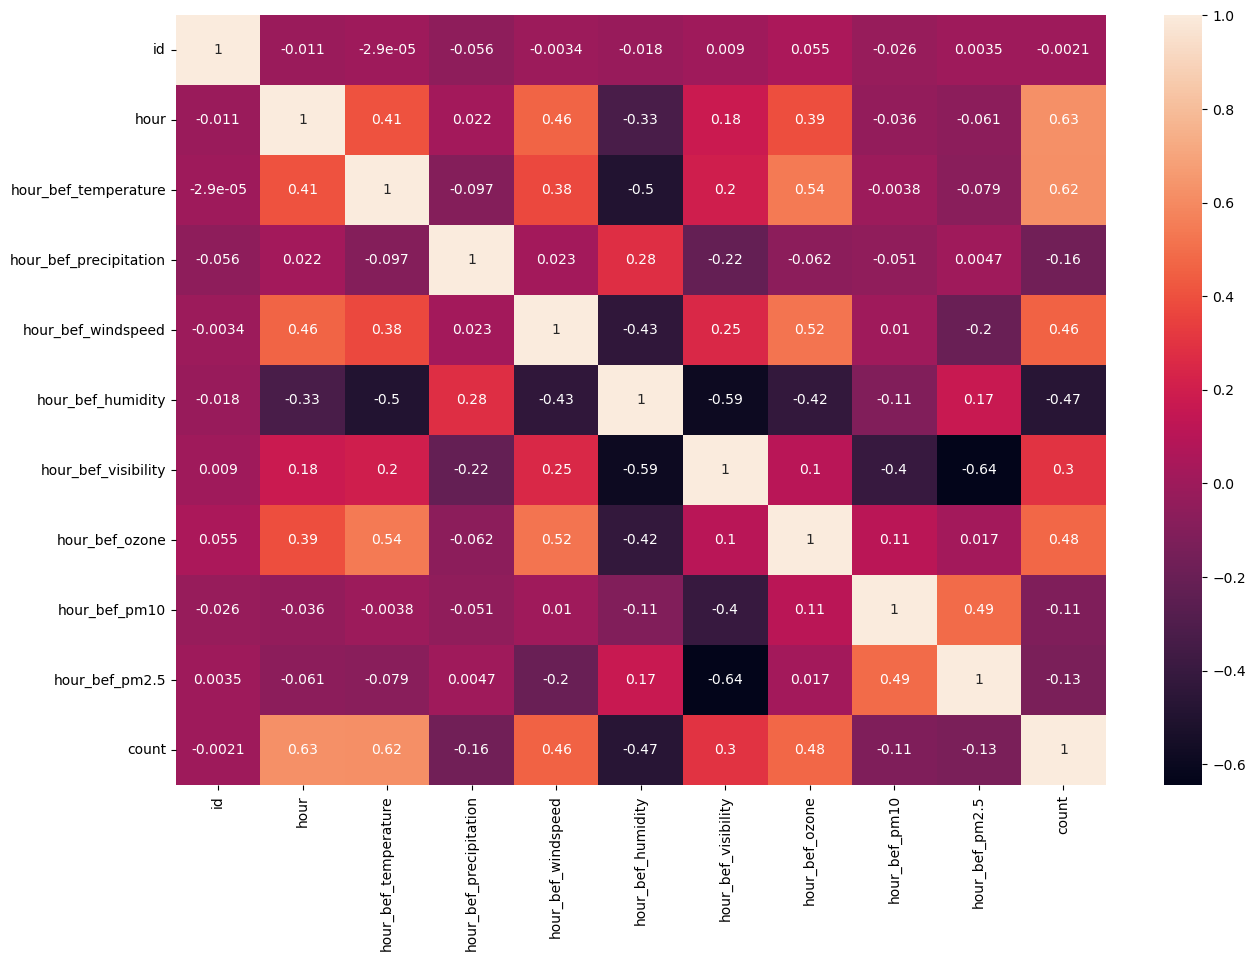

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
sns.heatmap(train.corr(), annot = True)

In [32]:
train.groupby('hour').mean()['hour_bef_windspeed']

hour
0     1.965517
1     1.836667
2     1.633333
3     1.620000
4     1.409836
5     1.296721
6     1.331148
7     1.262295
8     1.632787
9     1.829508
10    2.122951
11    2.485246
12    2.766667
13    3.281356
14    3.522951
15    3.768852
16    3.820000
17    3.801667
18    3.838333
19    3.595082
20    3.278333
21    2.755000
22    2.498361
23    2.195082
Name: hour_bef_windspeed, dtype: float64

In [33]:
data[data['hour_bef_windspeed'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
18,33,13,22.600000,0.000000,NaN,41.0,987.0,0.046,64.0,39.0,208.0
244,381,1,14.100000,0.000000,NaN,55.0,1992.0,NaN,NaN,NaN,38.0
260,404,3,14.000000,0.000000,NaN,50.0,2000.0,0.049,35.0,22.0,17.0
376,570,0,14.300000,0.000000,NaN,49.0,2000.0,0.044,37.0,20.0,58.0
780,1196,20,16.500000,0.000000,NaN,31.0,2000.0,0.058,39.0,18.0,181.0
934,1420,0,14.788136,0.016393,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,20.926667,0.016667,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1138,1717,12,21.400000,0.000000,NaN,44.0,1375.0,0.044,61.0,37.0,116.0
1229,1855,2,14.000000,0.000000,NaN,52.0,2000.0,0.044,37.0,20.0,20.0
653,1943,19,19.704918,0.032787,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
data.loc[18,'hour_bef_windspeed'] = 1.965517
data.loc[244,'hour_bef_windspeed'] = 1.836667
data.loc[260,'hour_bef_windspeed'] = 1.620000
data.loc[376,'hour_bef_windspeed'] = 1.965517
data.loc[780,'hour_bef_windspeed'] = 3.278333
data.loc[934,'hour_bef_windspeed'] = 1.965517
data.loc[1035,'hour_bef_windspeed'] = 3.838333
data.loc[1138,'hour_bef_windspeed'] = 1.633333
data.loc[1229,'hour_bef_windspeed'] = 1.633333
data.loc[653,'hour_bef_windspeed'] = 3.595082

In [35]:
data[data['hour_bef_windspeed'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count


In [36]:
data[data['hour_bef_ozone'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
14,28,1,20.000000,0.000000,1.800000,58.0,2000.0,NaN,NaN,NaN,74.0
44,76,17,21.700000,0.000000,3.000000,35.0,2000.0,NaN,32.0,19.0,213.0
46,78,1,12.200000,0.000000,3.000000,49.0,1071.0,NaN,NaN,NaN,36.0
84,130,1,9.400000,0.000000,2.500000,65.0,1907.0,NaN,NaN,NaN,39.0
122,181,16,26.200000,0.000000,4.300000,31.0,1718.0,NaN,47.0,23.0,136.0
...,...,...,...,...,...,...,...,...,...,...,...
653,1943,19,19.704918,0.032787,3.595082,NaN,NaN,NaN,NaN,NaN,NaN
658,1959,14,28.200000,0.000000,1.800000,51.0,1814.0,NaN,25.0,18.0,NaN
694,2104,1,21.700000,0.000000,1.700000,75.0,957.0,NaN,NaN,NaN,NaN
710,2148,1,24.600000,0.000000,2.400000,60.0,1745.0,NaN,NaN,NaN,NaN


In [37]:
features = ['hour','hour_bef_temperature','hour_bef_windspeed']
X_train = data[0:train.shape[0]].copy()
X_train = X_train[features]
Y_train = train['count']

In [38]:
X_train

,hour,hour_bef_temperature,hour_bef_windspeed
0,20,16.3,1.5
1,13,20.1,1.4
2,6,13.9,0.7
3,23,8.1,2.7
4,18,29.5,4.8
...,...,...,...
1454,4,16.8,1.6
1455,3,10.8,3.8
1456,5,18.3,1.9
1457,21,20.7,3.7


In [39]:
X_train[X_train['hour_bef_windspeed'].isna()]

,hour,hour_bef_temperature,hour_bef_windspeed


In [40]:
X_test = data[train.shape[0]:].copy()

In [41]:
X_test = X_test[features]

In [42]:
X_test.shape

(715, 3)

In [43]:
X_test[X_test['hour_bef_temperature'].isna()]

,hour,hour_bef_temperature,hour_bef_windspeed


In [44]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

# 모델 튜닝 및 평가
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

/opt/anaconda3/envs/ml_study_test/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [45]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [46]:
model100 = RandomForestRegressor(n_estimators=100, random_state =0)
model100_5 = RandomForestRegressor(n_estimators=100, max_depth = 5, random_state =0)
model200 = RandomForestRegressor(n_estimators=200)

In [47]:
model100.fit(X_train, Y_train)
model100_5.fit(X_train, Y_train)
model200.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=200)

In [48]:
ypred1 = model100.predict(X_test)
ypred2 = model100_5.predict(X_test)
ypred3 = model200.predict(X_test)

In [49]:
submission['count']= ypred1
submission.to_csv('model100.csv',index = False)


submission['count']= ypred2
submission.to_csv('model100_5.csv',index = False)

submission['count']= ypred3
submission.to_csv('model200.csv',index = False)